In [1]:
import pandas as pd

In [11]:
import pandas as pd

class DivAchievers:
    def __init__(self):
        self.df = pd.read_csv('./data/dividend_achievers.csv')

    def getFiveYearDivGrowthRate(self, ticker):
        if not self.isTickerAvailable(ticker):
            raise Exception('ticker is not available~')

        fiveYearDivGrowthRate = self.df['5-Year Dividend Growth (Annualized)'][self.df['Ticker'] == ticker].values[0]
        return fiveYearDivGrowthRate

    def getCurDivYield(self, ticker):
        if not self.isTickerAvailable(ticker):
            raise Exception('ticker is not available~')

        curDivYield = self.df['Dividend Yield'][self.df['Ticker'] == ticker].values[0]
        return curDivYield    
    
    def isTickerAvailable(self, ticker):
        return ticker in self.df['Ticker'].values
    

def getFutureDividend(capital, cur_div_yield, interest_rate, years):
    futureDividends = []
    #utureDividends.append(round(capital * cur_div_yield))
    for year in range(1, years+1):
        futureDividend = capital * cur_div_yield * ((1+ interest_rate)**year)
        futureDividends.append(round(futureDividend))
    return futureDividends    

In [12]:
ticker = 'TXN'

In [13]:
divAchievers = DivAchievers()

In [14]:
fiveYearDivGrowthRate = divAchievers.getFiveYearDivGrowthRate(ticker)
fiveYearDivGrowthRate

0.148698355

In [15]:
curDivYield = divAchievers.getCurDivYield(ticker)
curDivYield

0.0288976928

In [16]:
capital = 1000000
periods = 30
futureDividends = getFutureDividend(capital, 0.028, fiveYearDivGrowthRate, periods)

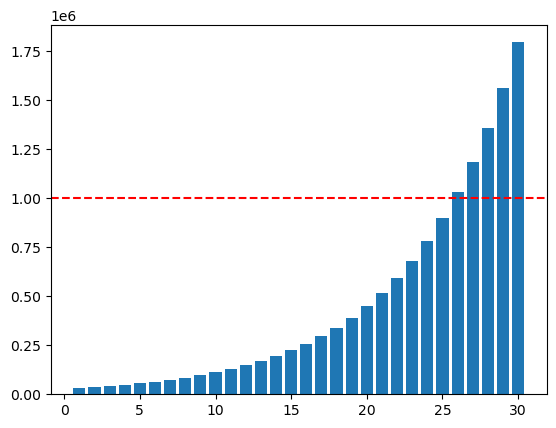

In [19]:
import matplotlib.pyplot as plt
plt.bar(range(1, periods+1), futureDividends)
plt.axhline(y = capital, color = 'r', linestyle = '--')
plt.show()

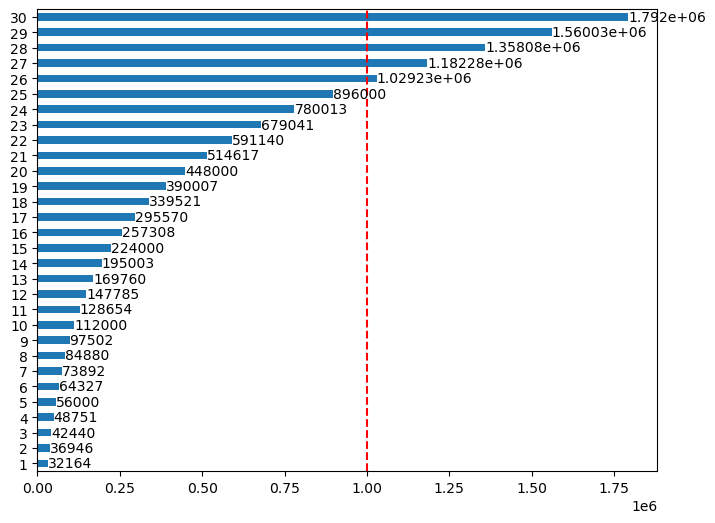

In [26]:
score_series = pd.Series(futureDividends)
plt.figure(figsize=(8, 6))
fig = score_series.plot(kind='barh')
fig.set_yticklabels(range(1, periods+1))
fig.bar_label(fig.containers[0], label_type='edge')
plt.axvline(x = capital, color = 'r', linestyle = '--')
plt.show()